#Section 1: Load the dataset and perform exploratory data analysis (EDA)

 1a. Import the
necessary libraries (pandas, numpy, matplotlib, seaborn)

 1b. Load the dataset
using pandas and display the first few rows 

In [8]:
# Download this file from the internet to my machine 
!wget https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv



--2023-04-05 23:02:03--  https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ArinB/MSBA-CA-Data/main/CA06/Mall_Customers.csv [following]
--2023-04-05 23:02:04--  https://raw.githubusercontent.com/ArinB/MSBA-CA-Data/main/CA06/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/plain]
Saving to: ‘Mall_Customers.csv.3’

Mall_Customers.csv. 100%[===================>]   4.19K  --.-KB/s    in 0s      

2023-04-05 23:02:04 (40.2 MB/s) - ‘Mall_Customers.csv.3’ saved [4286/4286]



In [9]:
# Install Autoviz
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# import libraries 
import pandas as pd
import seaborn as sns
%matplotlib inline

# download the dataset and save it to my  local machine
url = 'https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv'
df = pd.read_csv(url)
df.to_csv('Mall_Customers.csv', index=False)


In [11]:
# see the first few lines of the dataset

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#see the shape of the dataset

df.shape

(200, 5)

In [13]:
# see the dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


1d. Visualize the distribution of features using
histograms or boxplots

Shape of your Data Set loaded: (200, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
CustomerID,200,int64,0,0.000000,100.000000,0,possible ID column: drop
Spending Score (1-100),84,int64,0,0.000000,42.000000,0,
Annual Income (k$),64,int64,0,0.000000,32.000000,0,
Age,51,int64,0,0.000000,25.500000,0,
Genre,2,object,0,0.000000,1.000000,88,


    5 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['CustomerID']
Number of All Scatter Plots = 6


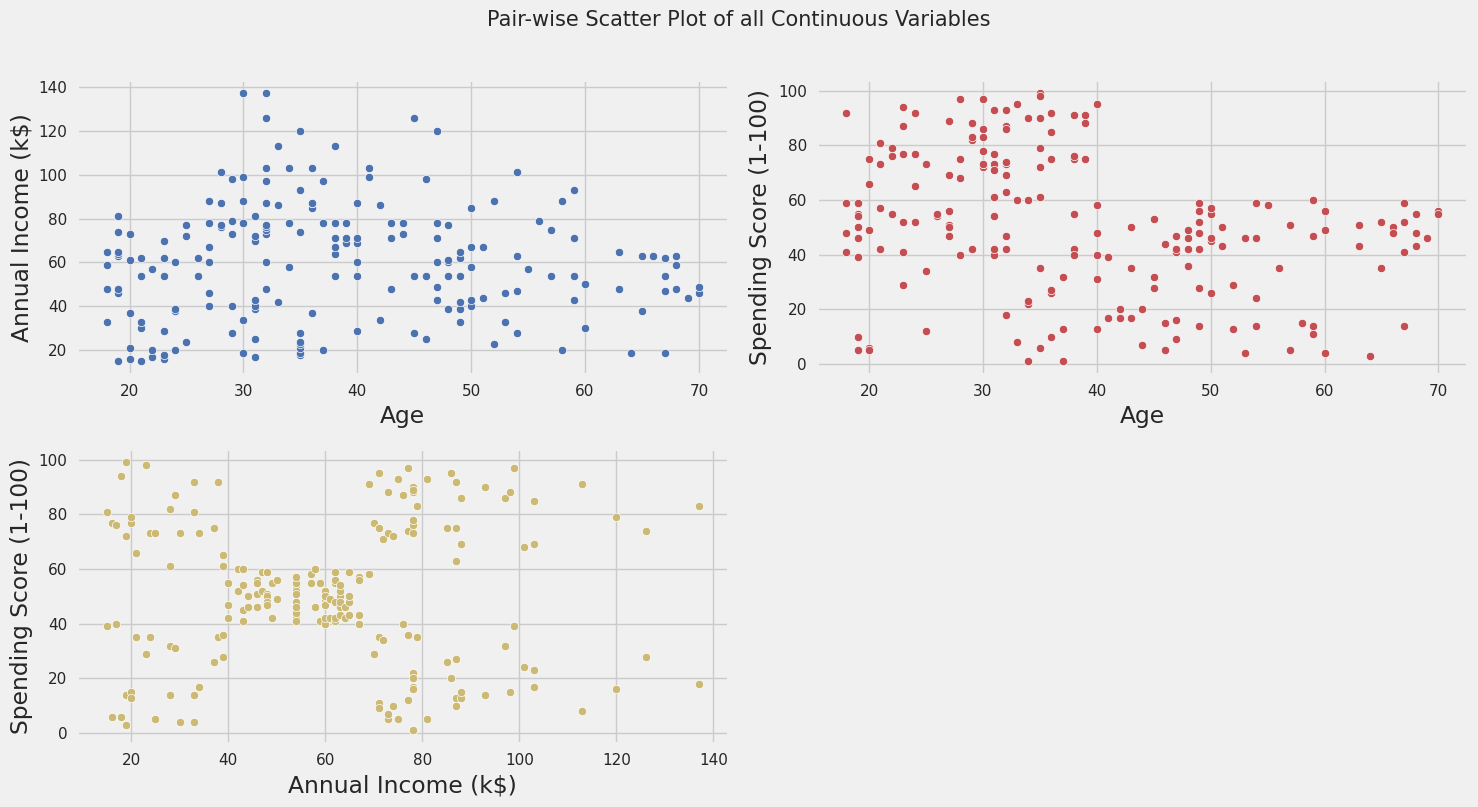

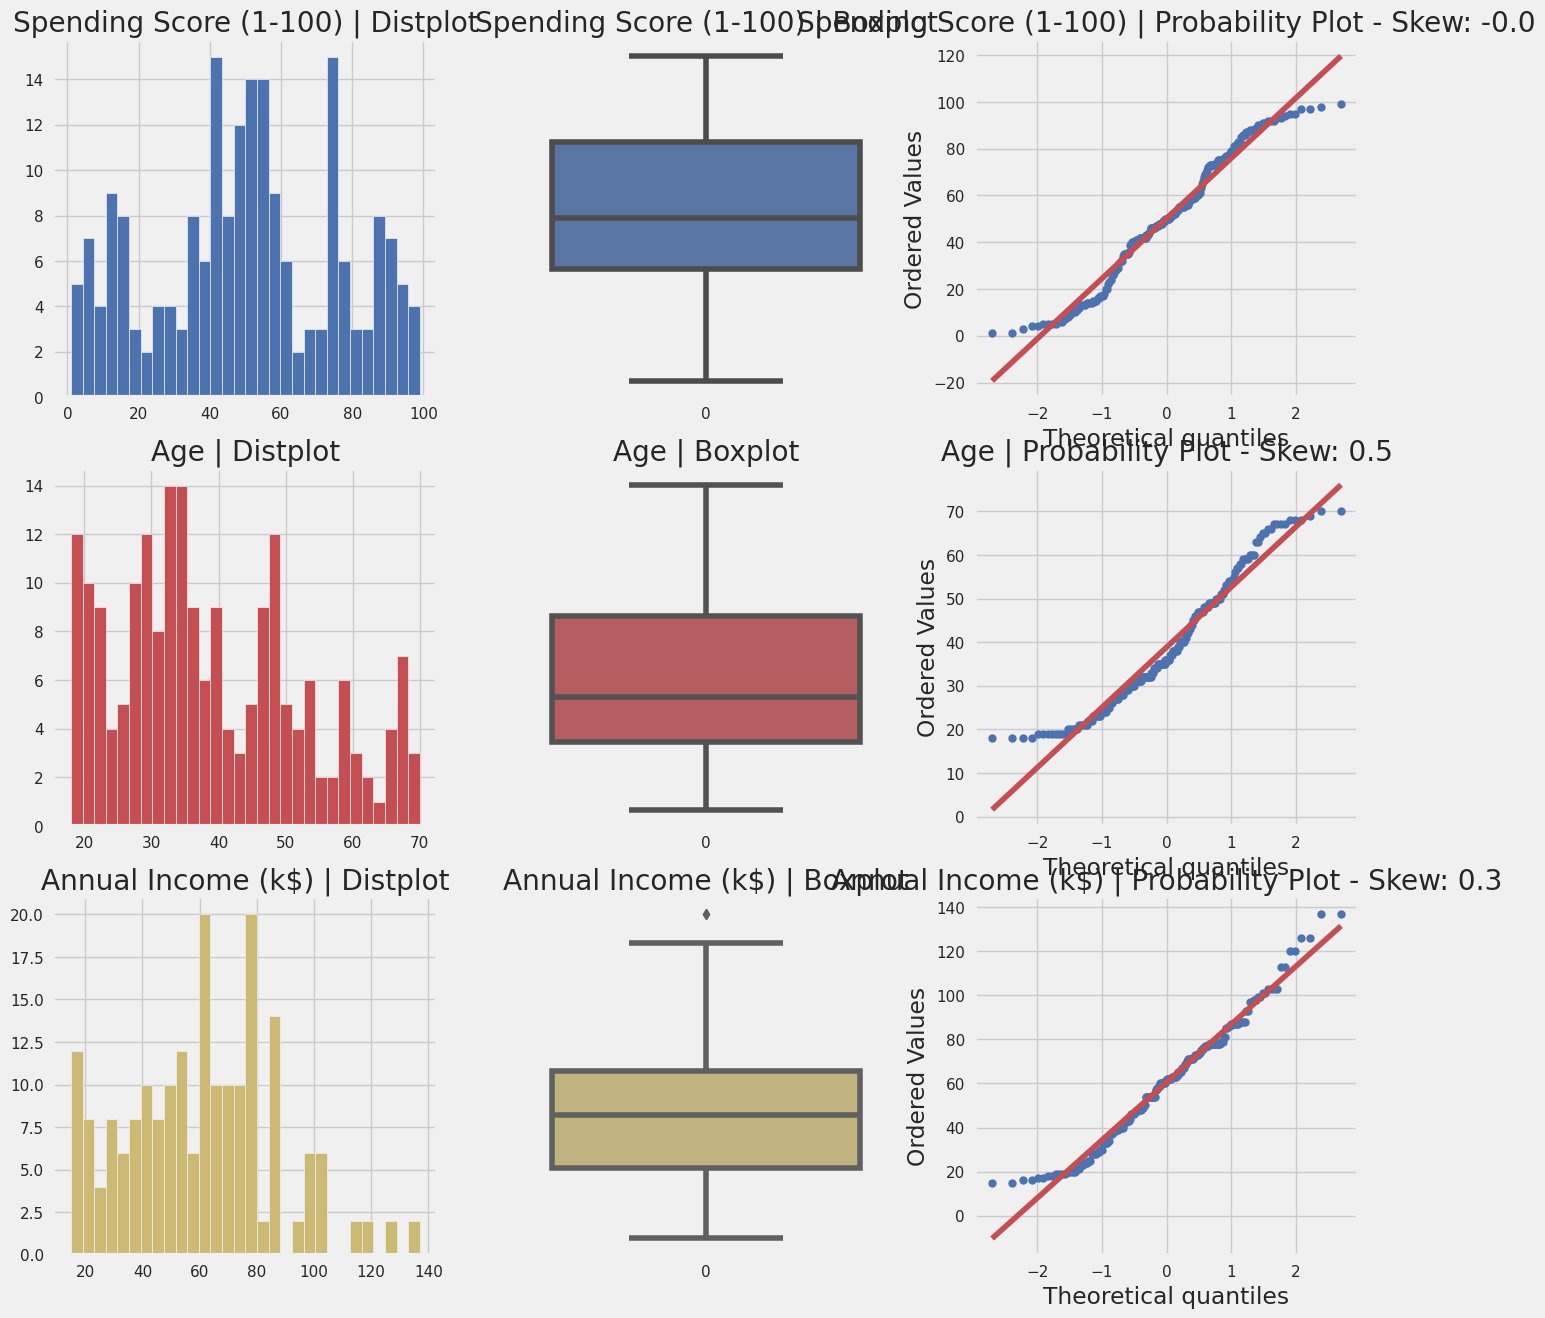

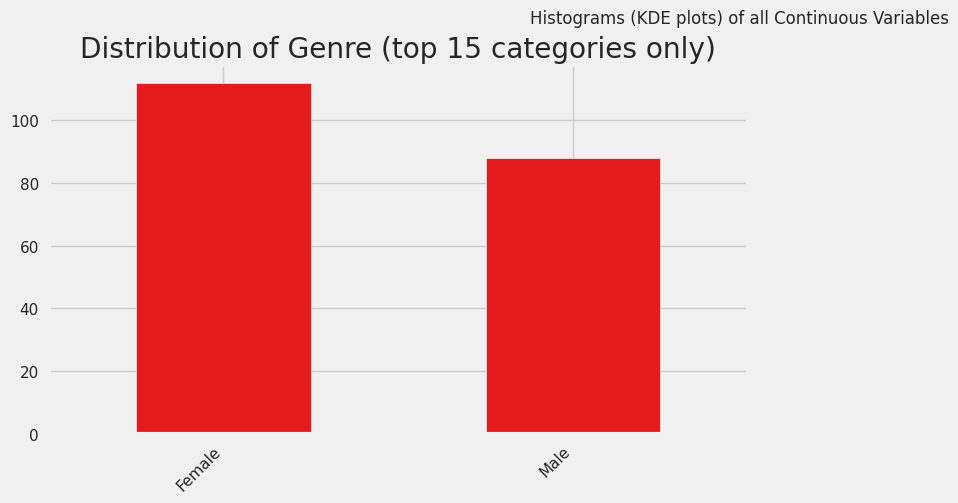

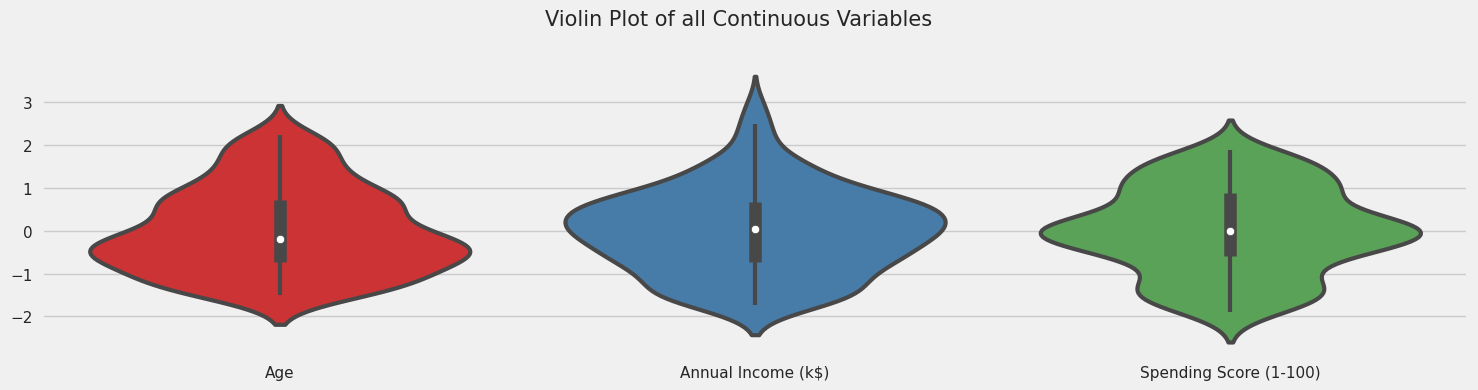

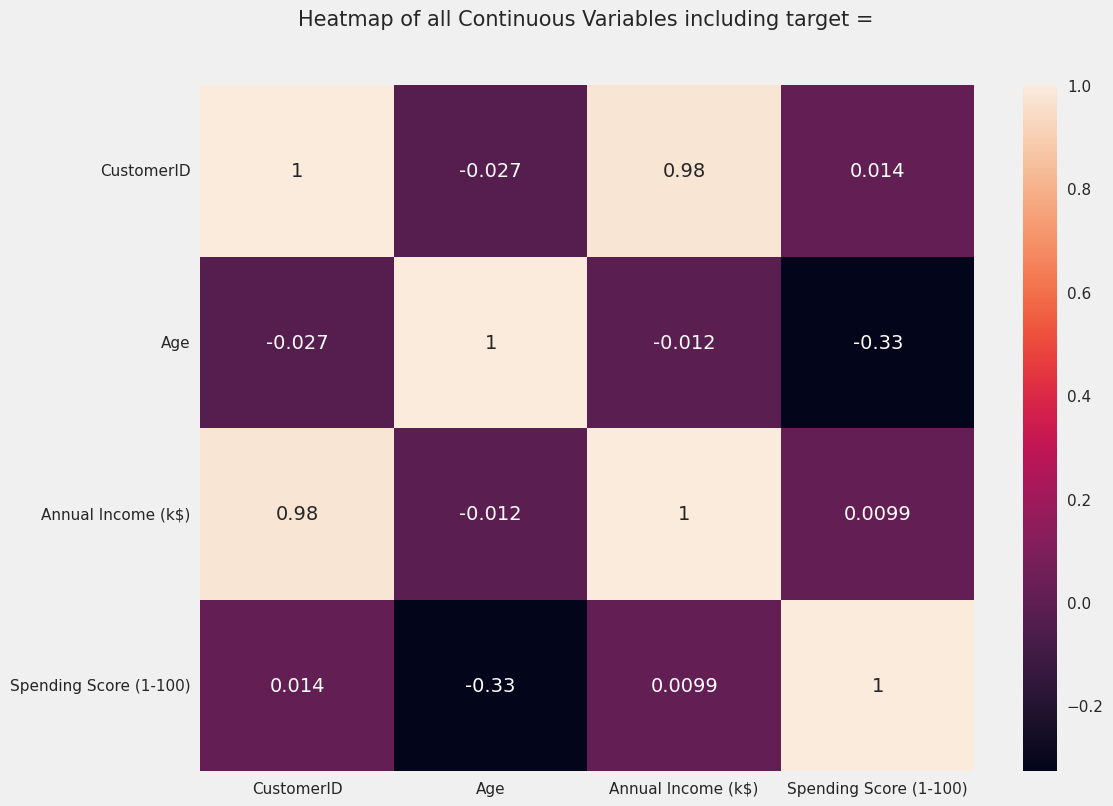

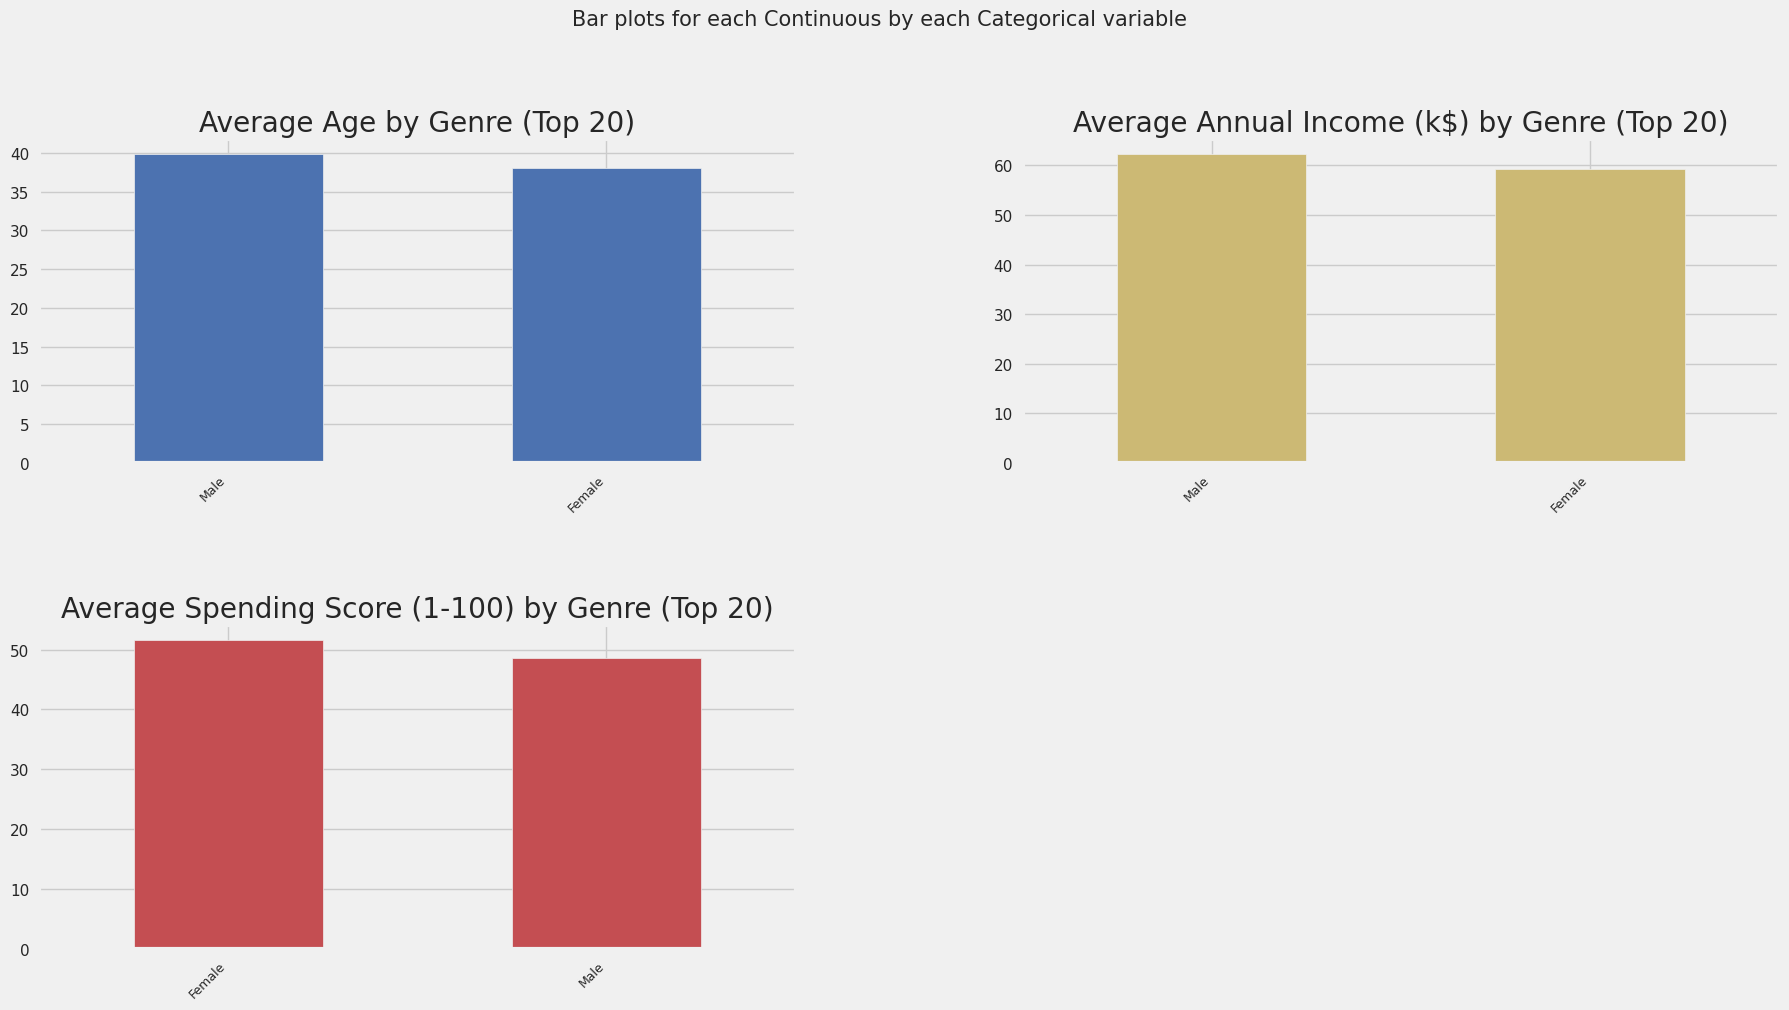

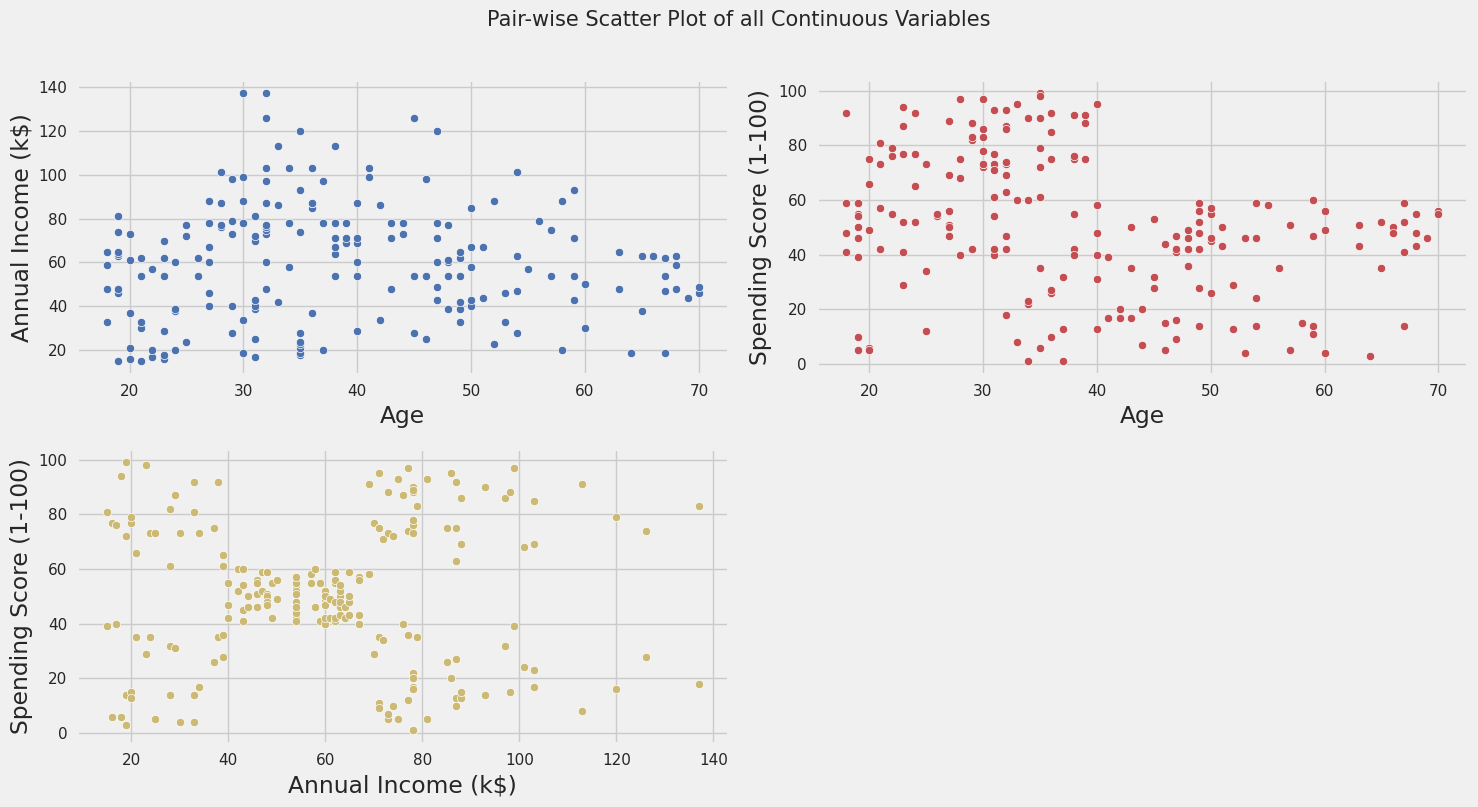

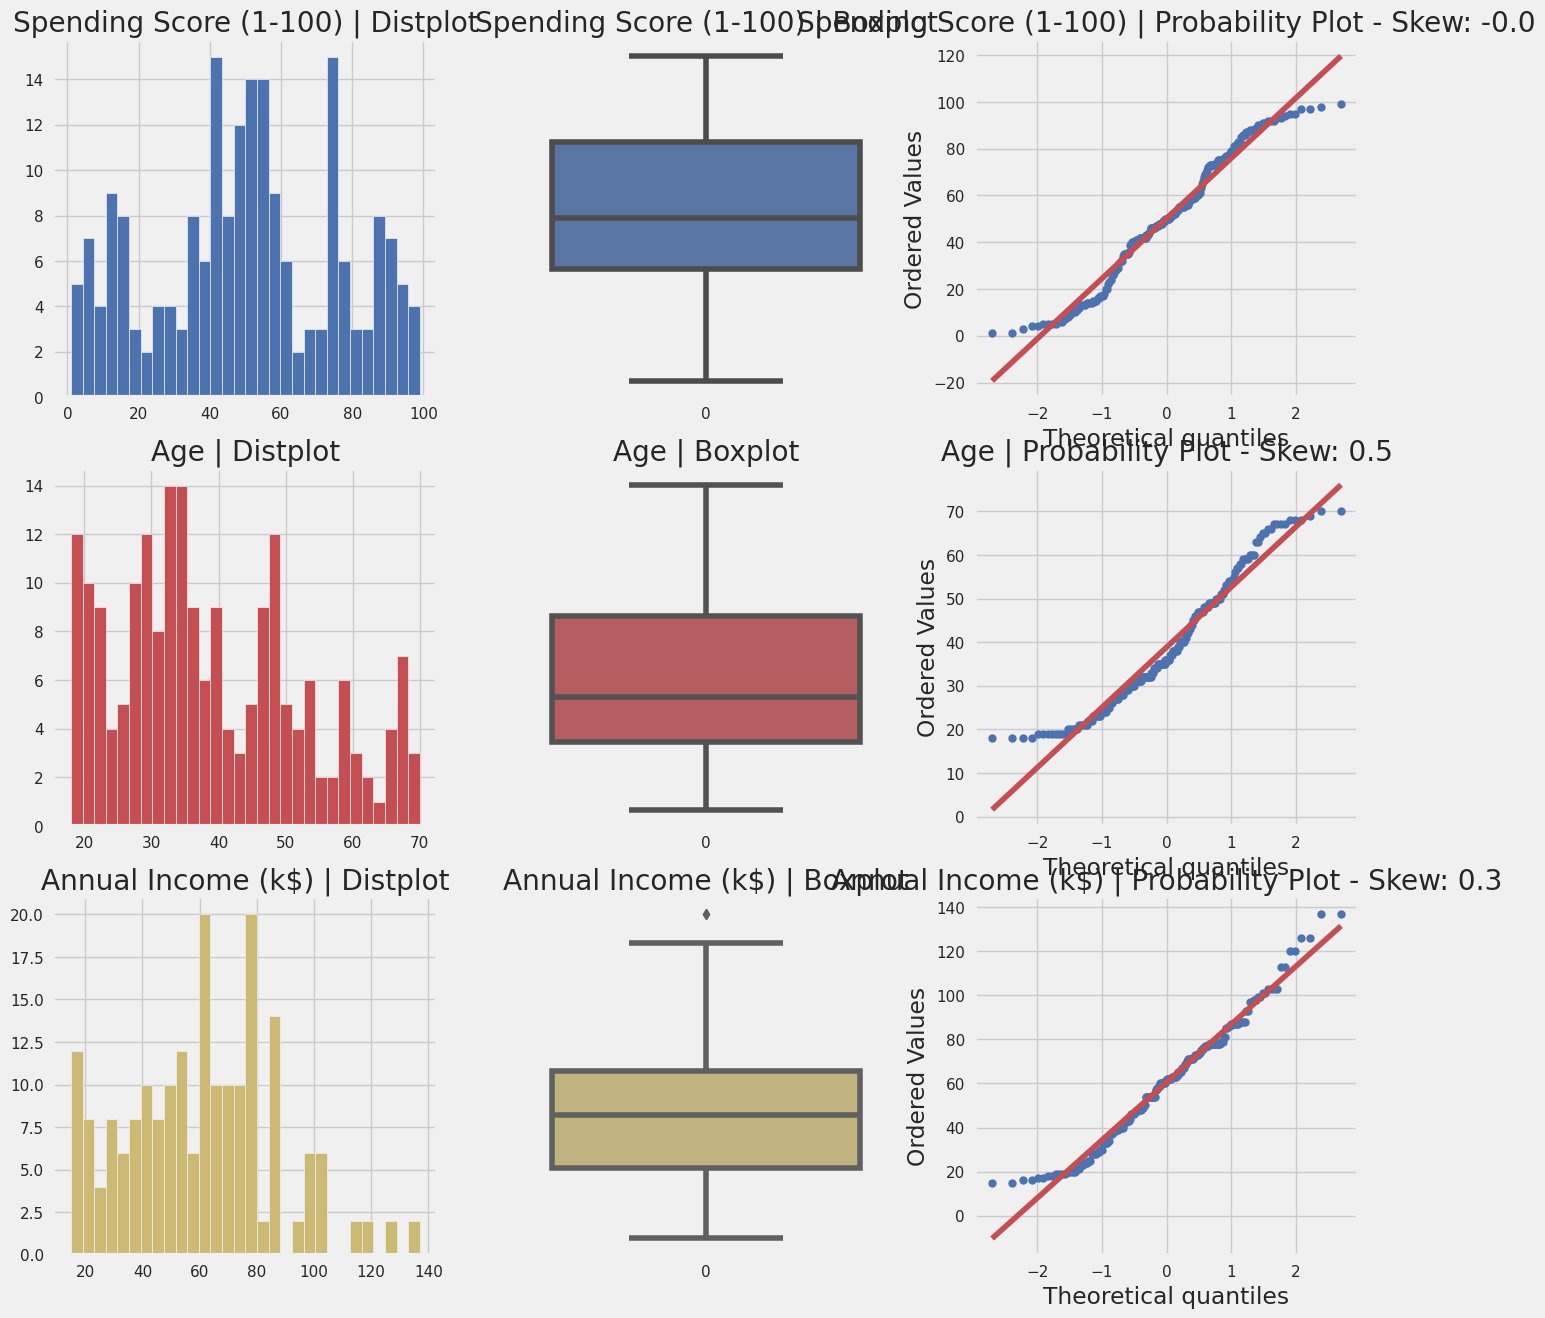

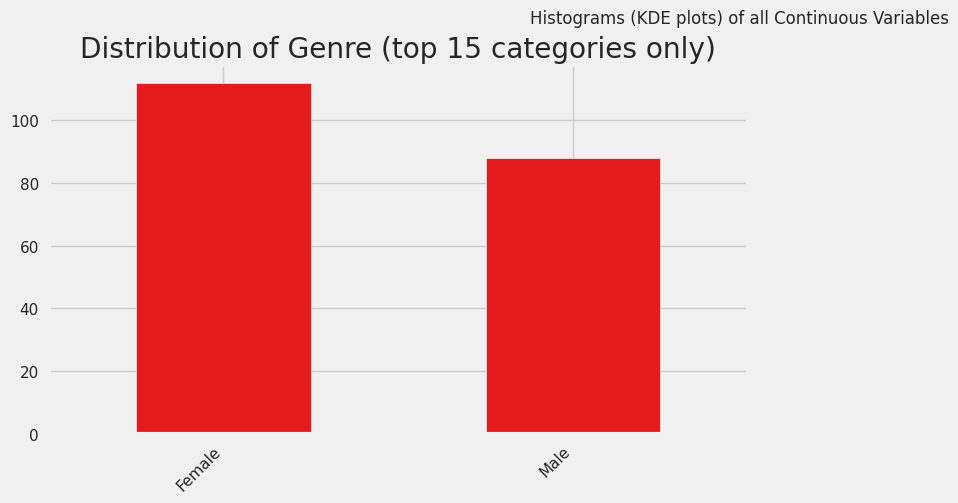

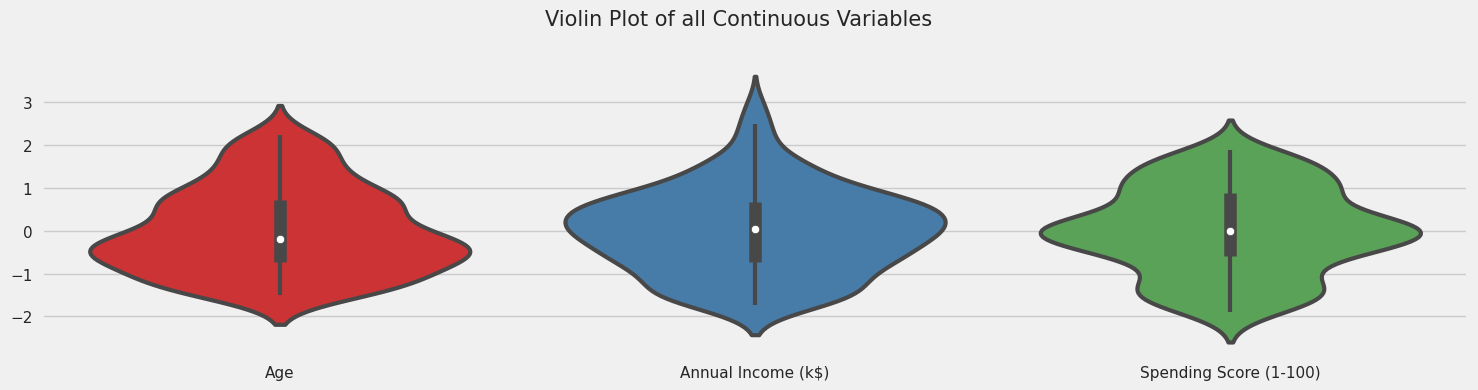

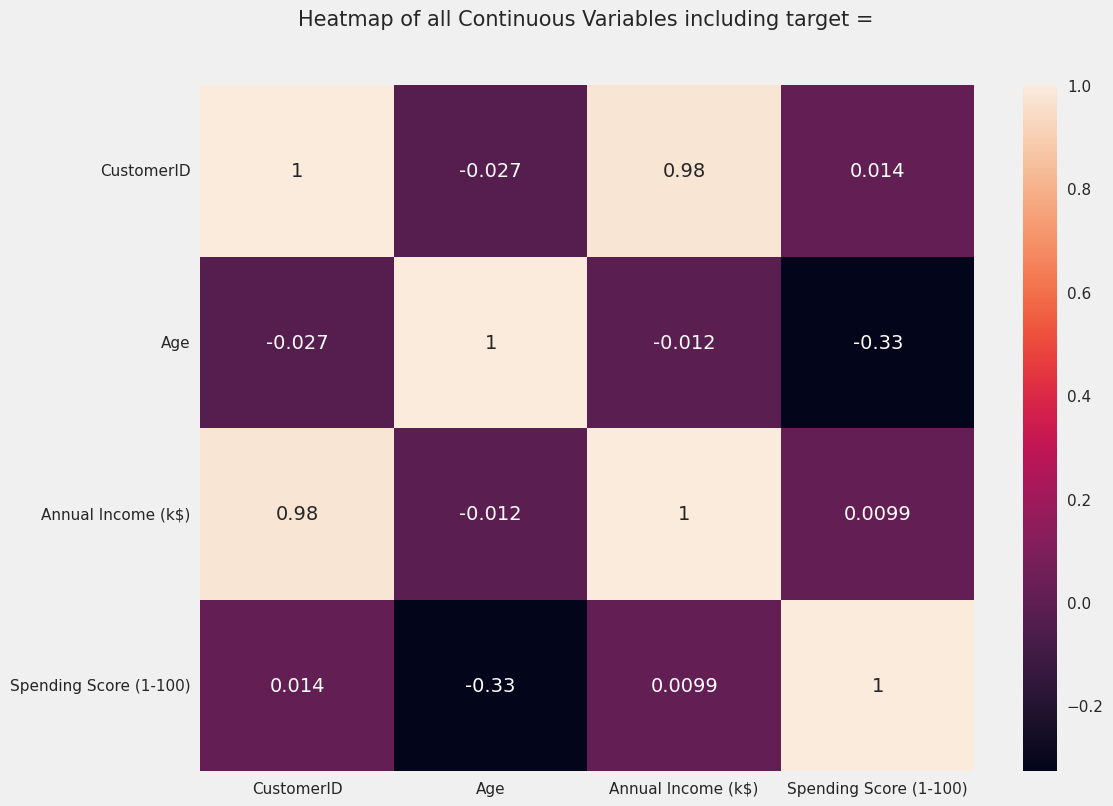

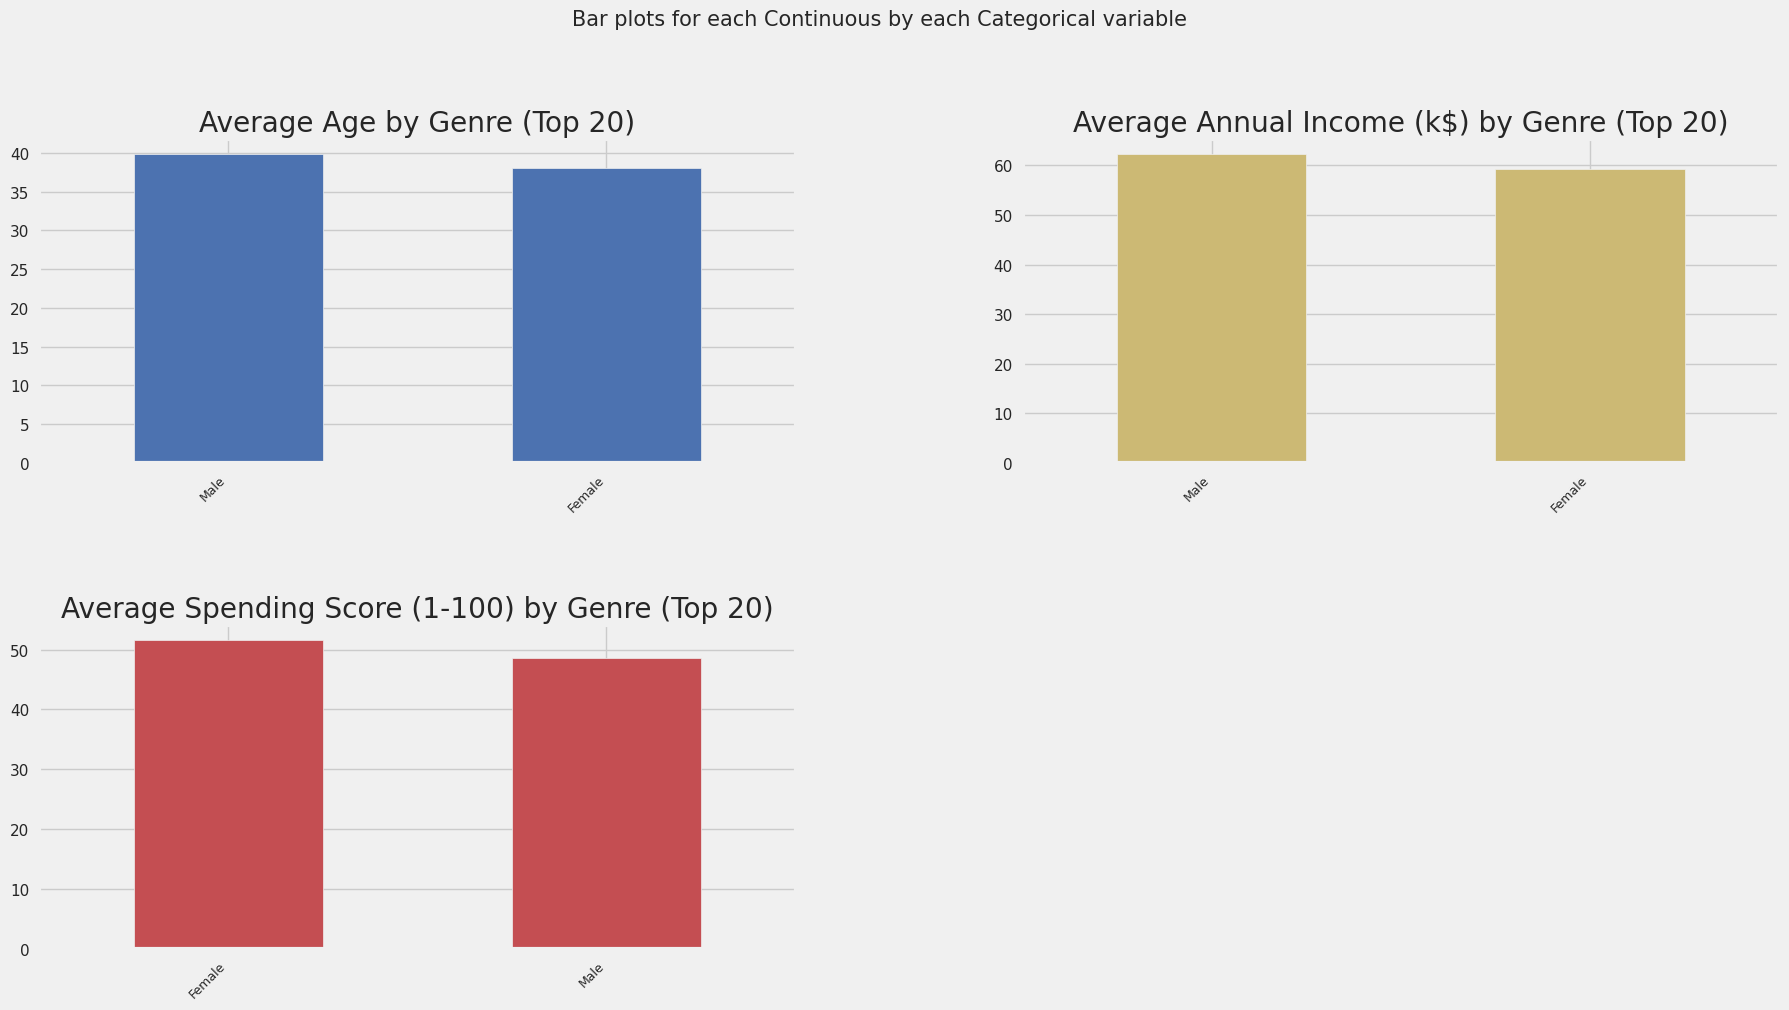

All Plots done
Time to run AutoViz = 19 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
# create an instance of AutoViz and pass the file path
AV = AutoViz_Class()
AV.AutoViz('Mall_Customers.csv')

In [15]:
# check for duplicates

df.duplicated().sum()

0

In [16]:
# check for null values 
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
# describe the data set and see attributes for each feature 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


I want to use box plots to easily check for outliers 

<Axes: xlabel='Age'>

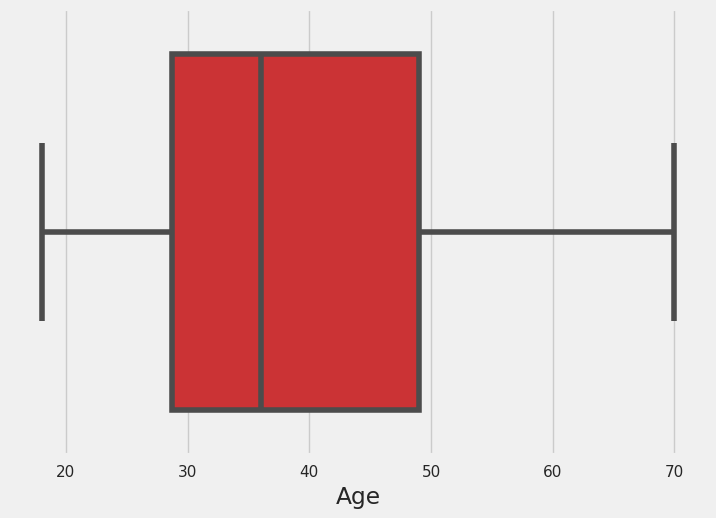

In [18]:
# create a box plot to check for outliers
import seaborn as sns

sns.boxplot(x=df['Age'])

<Axes: xlabel='Annual Income (k$)'>

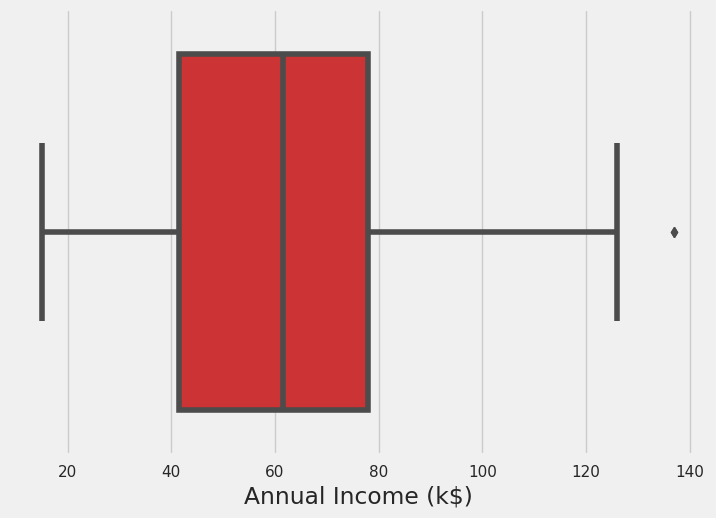

In [19]:
# check for outliers in the annual income column
sns.boxplot(x=df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)'>

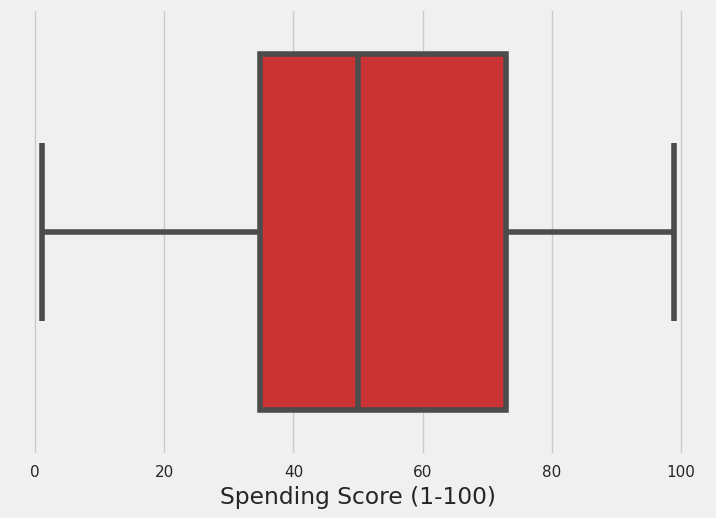

In [20]:
# check for outliiers in the spending score column
sns.boxplot(x=df['Spending Score (1-100)'])


In [21]:
# impute the mean for the row where there was an outlier
mean_income = df.loc[df['Annual Income (k$)']<=120, 'Annual Income (k$)'].mean()
df.loc[df['Annual Income (k$)']>120, 'Annual Income (k$)'] = mean_income


In [22]:
# check to make sure the row was imputed and there are no more rows that have outliers for this feature  
df[df['Annual Income (k$)']>120]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [23]:
# make sure the data shape is the same 
df.shape

(200, 5)

Outliers were removed. Let's scale and normalize the data, but before I do that, it's important to understand if the features I'm interested in, annual income and spending score, are normally distributed

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

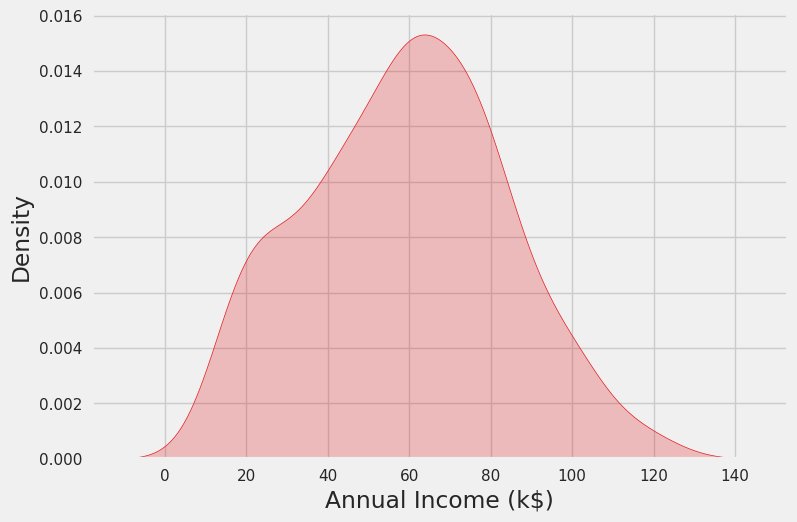

In [24]:
# view the distribution for annual income 
sns.kdeplot(df['Annual Income (k$)'], shade=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

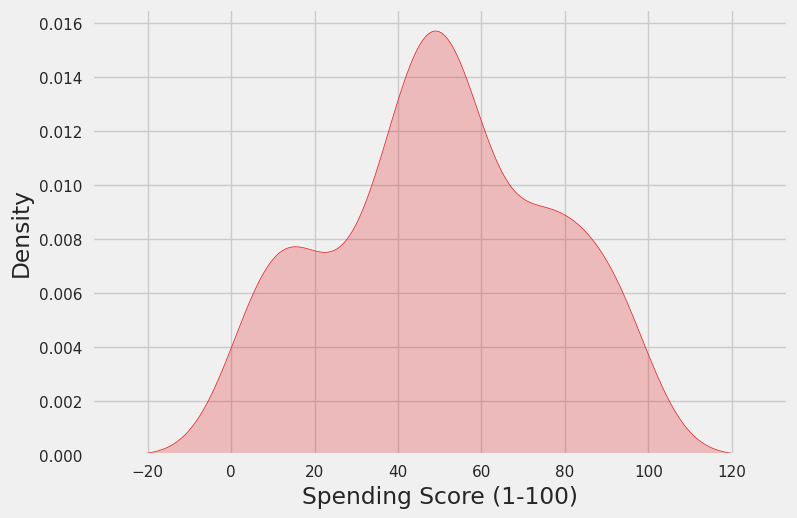

In [25]:
# view the distribution for spending score 
sns.kdeplot(df['Spending Score (1-100)'], shade=True)

#Section 2: Prepare the data for clustering

2b. Choose the appropriate features for
clustering (you may start with 'Annual Income' and 'Spending Score') 

2c. Create a
new DataFrame with only the selected features

In [26]:
# Choose features that would provide the most insights, Annual income and Spending score for anlaysis.
# both of them are the most impactful variables and could provide insights around spending levels for stakeholders

x = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

2a. Perform any necessary feature scaling
(StandardScaler or MinMaxScaler)

In [27]:
# use min max scaler as the feature normalization technique since 
# the variables that we're looking at are relatively normally distributed
# fit minmaxscaler to the x variable 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x)
print(scaler)
MinMaxScaler()


MinMaxScaler()


MinMaxScaler()

In [28]:
# confirm scaler feature range 

scaler.feature_range

(0, 1)

the scaler feature range is 0 and 1, which means that we were able to fit the data to the scaler, as the range should be between 0 and 1 when using minmaxscaler

In [29]:
# apply the scaling transformation to the dataset 
scaler.transform(x) 

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00952381, 0.05102041],
       [0.00952381, 0.7755102 ],
       [0.01904762, 0.39795918],
       [0.01904762, 0.76530612],
       [0.02857143, 0.05102041],
       [0.02857143, 0.94897959],
       [0.03809524, 0.02040816],
       [0.03809524, 0.7244898 ],
       [0.03809524, 0.13265306],
       [0.03809524, 1.        ],
       [0.04761905, 0.14285714],
       [0.04761905, 0.7755102 ],
       [0.04761905, 0.12244898],
       [0.04761905, 0.79591837],
       [0.05714286, 0.34693878],
       [0.05714286, 0.66326531],
       [0.07619048, 0.28571429],
       [0.07619048, 0.98979592],
       [0.08571429, 0.34693878],
       [0.08571429, 0.73469388],
       [0.0952381 , 0.04081633],
       [0.0952381 , 0.73469388],
       [0.12380952, 0.13265306],
       [0.12380952, 0.82653061],
       [0.12380952, 0.31632653],
       [0.12380952, 0.6122449 ],
       [0.13333333, 0.30612245],
       [0.13333333, 0.87755102],
       [0.

#Section 3: Implement k-means clustering

3a. Import the KMeans class from the
sklearn.cluster module

3b. Use the Silhouette Method to determine the optimal
number of clusters

The silhouette score measure how well each data point fits into tis assigned cluster and how different it is from other clusters. A 1 indicates that the data is well matched, while a -1 indicates that the data is poorly matched to other clusters. Higher silhouette scores equate to better clustering. 

Let's use the silhoutte score to determine the number of clusters 

For n_clusters = 2 The average   silhoutte_score is : 0.2965523183411425
For n_clusters = 3 The average   silhoutte_score is : 0.44873172208681267
For n_clusters = 4 The average   silhoutte_score is : 0.488813046152858
For n_clusters = 5 The average   silhoutte_score is : 0.5539842078993208
For n_clusters = 6 The average   silhoutte_score is : 0.46134883978415525
For n_clusters = 7 The average   silhoutte_score is : 0.4453688249110497
For n_clusters = 8 The average   silhoutte_score is : 0.4260817373325834
For n_clusters = 9 The average   silhoutte_score is : 0.4305316897908719
For n_clusters = 10 The average   silhoutte_score is : 0.41694596584426935


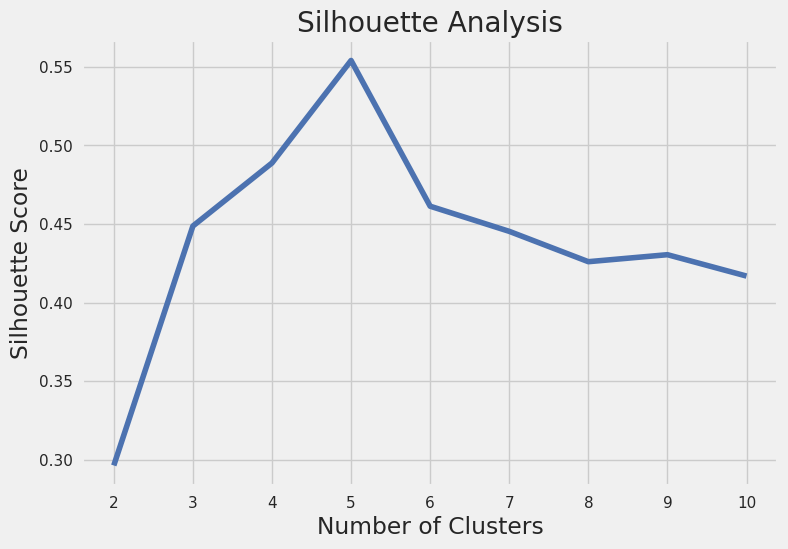

In [30]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Create empty lists to store the silhouette scores and number of clusters
silhouette_scores = []
clusters = range(2,11)

# Loop through different numbers of clusters
for k in clusters:
    # Create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the KMeans object to the data
    cluster_labels = kmeans.fit_predict(x)
    #The silhouette_score gives the average value for all the   samples.
    #Calculating number of clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", k, "The average   silhoutte_score is :", silhouette_avg)
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)
    
# Plot the silhouette scores vs. number of clusters
plt.plot(clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

 3c. Train the KMeans model with the optimal number of
clusters 

3d. Obtain the cluster assignments for each data poin

In [31]:
# train the model with the optimal number of clusters

kmeans = KMeans(n_clusters = 5, init = 'k-means++') #initalize the class object
label = kmeans.fit_predict(x) #return the cluster number for each of the data points
print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 3 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 3 3 0 2]


# Section 4: Visualize and analyze the clusters

4a. Create a scatter plot of the selected features,
colored by cluster assignment

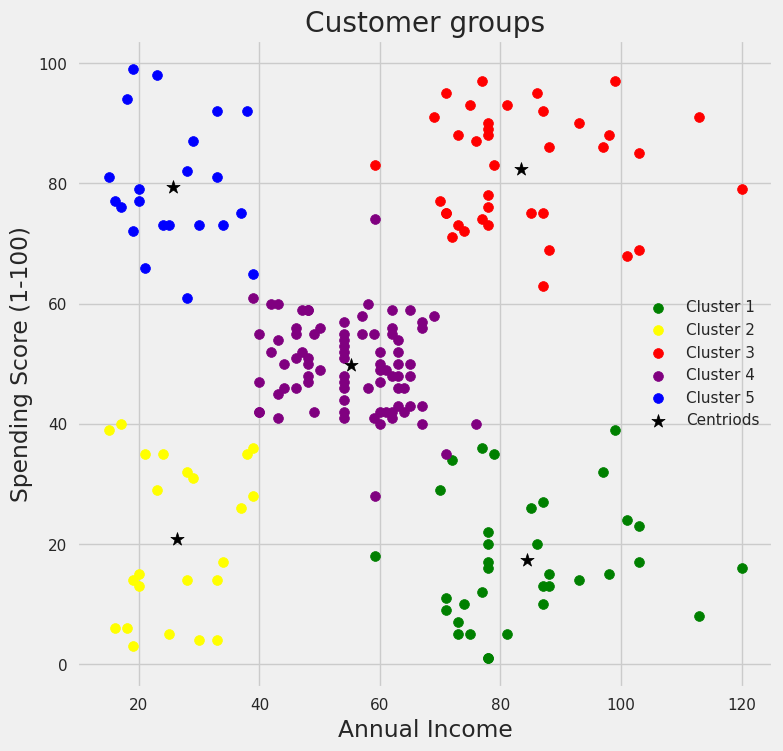

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(x[label == 0,0], x[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[label == 1,0], x[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(x[label == 2,0], x[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(x[label == 3,0], x[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(x[label == 4,0], x[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

cluster 4 has the highest degree of compactness. Most of the customers in this group have similar shopping behavior, even though there are a few that drift between the lower spending threshold. On the other hand, customers in clusters one and three have high intercluster similarity between other clusters, but are lower than cluster four when it comes to intracluster similarity. Illustrating that customers in these groups have a much more varied shopping and spending behavior than those in cluster 4. Comparatively, clusters two and five have medium intracluster similarity and medium intercluster similarity. These clusters are well made because of this.